In [2]:
import tensorflow as tf
tf.debugging.set_log_device_placement(False) #turn off unnecessary logging outputs
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
# Create some tensors
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)

print(c)

tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
#Tensorflow libs
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [6]:
import pathlib
#Declare url
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
#Create a file and download it with Keras utils
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
# get dataset path
data_dir = pathlib.Path(data_dir)

In [7]:
#get image count
image_count = len(list(data_dir.glob('*/*.jpg')))
print("Total Images:",image_count)

Total Images: 3670


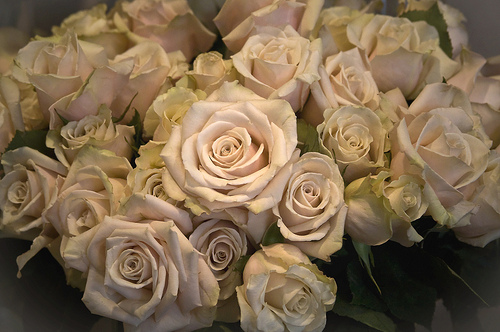

In [8]:
#get all images in rose file 
roses = list(data_dir.glob('roses/*'))
# show third image 
PIL.Image.open(str(roses[3]))

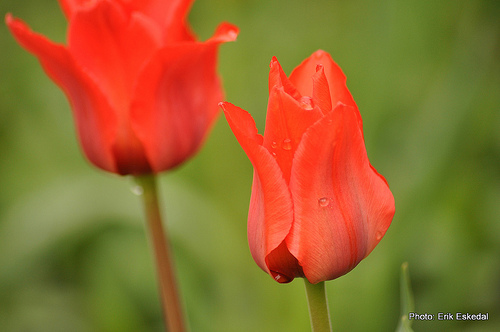

In [9]:
#get all images in tulips file
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[3]))

In [10]:
# Batch size
batch_size = 32
# image height
img_height = 180
# image width
img_width = 180

In [11]:
# split dataset for train
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [12]:
# split dataset for validation
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [13]:
#get class names
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


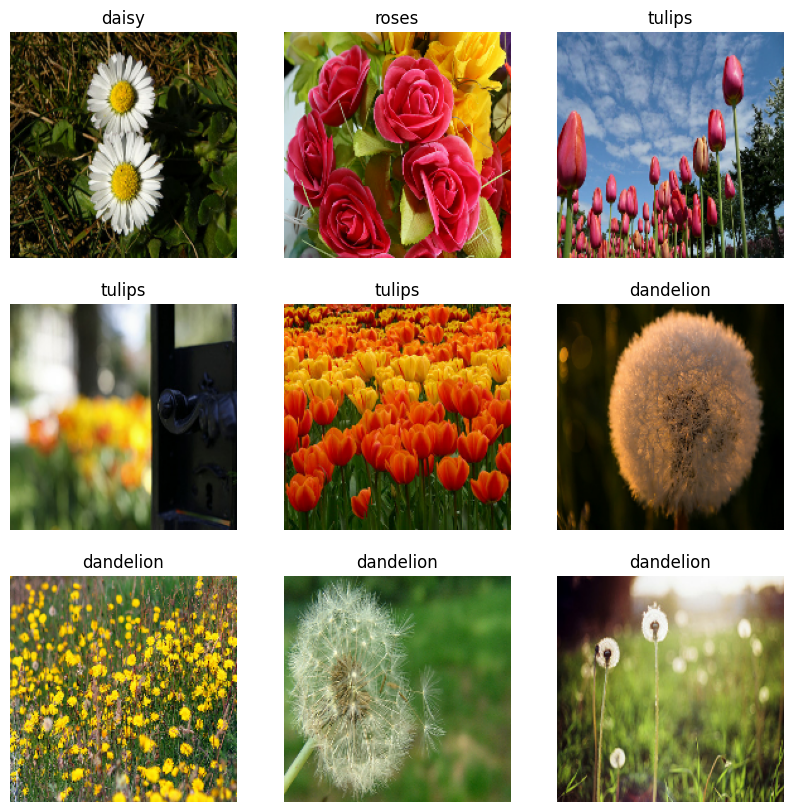

In [14]:
# determine figure size as 10 by 10
plt.figure(figsize=(10, 10))
# take image from train_ds
for images, labels in train_ds.take(2):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    # plot image using imshow
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [15]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [16]:
#Create autotune object
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [17]:
# Create a normalization layer
normalization_layer = layers.Rescaling(1./255)

#normalize dataser using with norm. layer
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# sparete as image and label
image_batch, labels_batch = next(iter(normalized_ds))
# check the first image max and min value
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print("minumum value:",np.min(first_image), "maximum values: ",np.max(first_image))


minumum value: 0.0 maximum values:  0.96902645


In [18]:
# get class names
num_classes = len(class_names)

# build model layers
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [19]:
#compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [21]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


2024-01-05 00:13:48.992499: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8904
2024-01-05 00:13:49.134252: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x154efd034230 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-05 00:13:49.134298: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A40, Compute Capability 8.6
2024-01-05 00:13:49.137403: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-01-05 00:13:49.231257: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


92/92 [==============================] - 5s 31ms/step - loss: 1.2861 - accuracy: 0.4581 - val_loss: 1.0211 - val_accuracy: 0.5817
Epoch 2/10
92/92 [==============================] - 1s 10ms/step - loss: 0.9714 - accuracy: 0.6168 - val_loss: 0.9421 - val_accuracy: 0.6185
Epoch 3/10
92/92 [==============================] - 1s 8ms/step - loss: 0.7779 - accuracy: 0.7050 - val_loss: 0.9438 - val_accuracy: 0.6308
Epoch 4/10
92/92 [==============================] - 1s 8ms/step - loss: 0.6135 - accuracy: 0.7687 - val_loss: 0.8513 - val_accuracy: 0.6798
Epoch 5/10
92/92 [==============================] - 1s 8ms/step - loss: 0.3992 - accuracy: 0.8631 - val_loss: 0.9939 - val_accuracy: 0.6458
Epoch 6/10
92/92 [==============================] - 1s 8ms/step - loss: 0.2206 - accuracy: 0.9305 - val_loss: 1.1460 - val_accuracy: 0.6649
Epoch 7/10
92/92 [==============================] - 1s 8ms/step - loss: 0.1008 - accuracy: 0.9687 - val_loss: 1.3400 - val_accuracy: 0.6580
Epoch 8/10
92/92 [===========

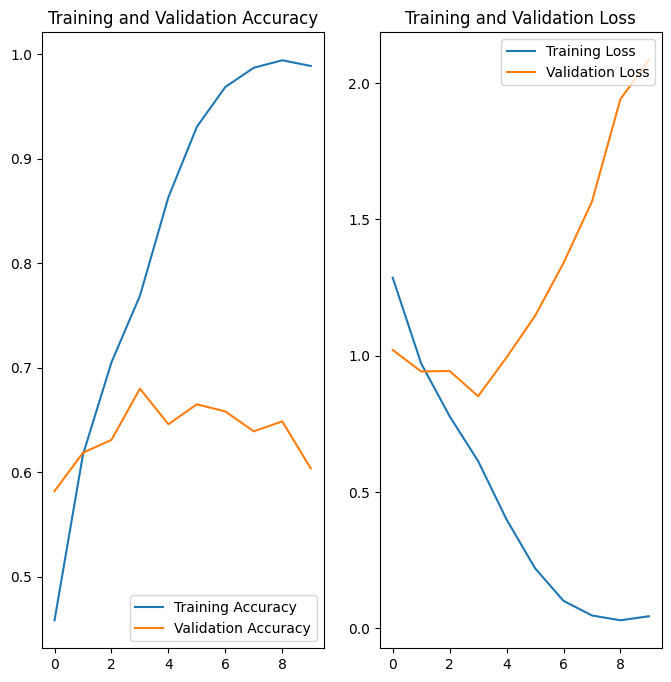

In [22]:
#get train accuracy in history
acc = history.history['accuracy']
#get validation accuracy
val_acc = history.history['val_accuracy']
# get train loss 
loss = history.history['loss']
#get validation loss
val_loss = history.history['val_loss']

epochs_range = range(epochs)
# plot accuracy
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
# plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
# create augmentation sequentions
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

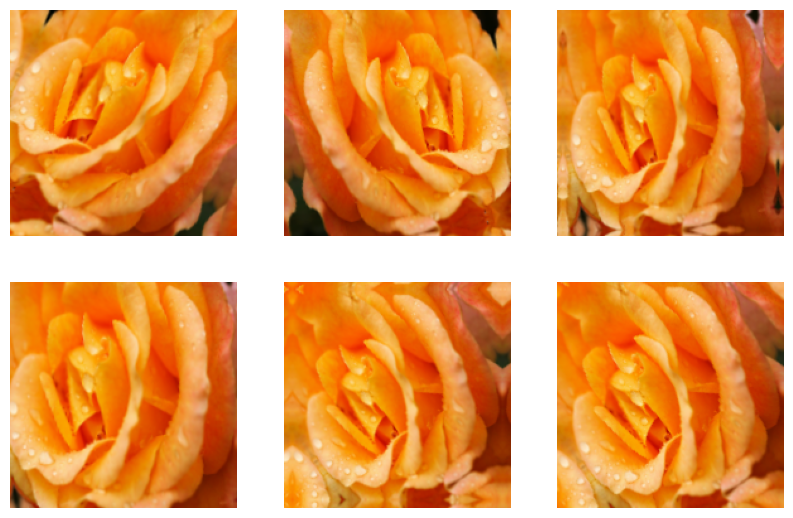

In [24]:
plt.figure(figsize=(10, 10))
#take second image in train dataset
for images, _ in train_ds.take(2):
  for i in range(6):
    #implement augmentation
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")